In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# CMSE 381, Fundamental Data Science Methods
## Homework 2, Fall 2025

**Name:** Monis, Lowell

---

### Question 1: ISLP $\S$ 3.7.8

This question involves the use of simple linear regression on the `Auto`data set.

In [4]:
auto = pd.read_csv('../data/Auto.csv')
auto=auto.replace('?', np.nan)
auto=auto.dropna()
auto['horsepower']=auto['horsepower'].astype('int')
auto=auto.reset_index(drop=True)

#### (a) Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor.  Use the `summarize()` function to print the results. Comment on the output as guided by the below questions.

1. Is there a relationship between the predictor and the response?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. *(modified from the textbook)* What are the predicted values for the inputs? Compute the RSS and MSE using these predicted values.

I commence by creating an ordinary least squares object as the model. All imports have been completed in the file preamble and may not be visible on the final document.

In [9]:
X = sm.add_constant(auto['horsepower'])
y = auto['mpg']
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        12:17:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model summary, I can conclude that there is a linear relationship between the predictor, i.e. `horsepower`, and the response, i.e. `mpg`. I can say this since the coefficient of determination as determined by the R-squared value is around 0.61. In other words, a little less than 61% of the variance in `mpg` is explained by `horsepower` linearly.

As for the strength of the relationship, the coefficient associated with the horsepower variable has a value of about -0.16. This leads me to conclude that there is a 

In [3]:
for i in auto.columns:
    print("There are", len(auto[i].unique()), "unique entries in predictor", i)

There are 127 unique entries in predictor mpg
There are 5 unique entries in predictor cylinders
There are 81 unique entries in predictor displacement
There are 93 unique entries in predictor horsepower
There are 346 unique entries in predictor weight
There are 95 unique entries in predictor acceleration
There are 13 unique entries in predictor year
There are 3 unique entries in predictor origin
There are 301 unique entries in predictor name


#### (b) What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in `numpy`.

I used the `describe()` method and selected specific rows rather than repetitively using a command. The range can be read from top to bottom (minimum to maximum).

In [4]:
auto.drop('origin', axis=1).describe().loc[['min','max']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0


#### (c) What is the mean and standard deviation of each quantitative predictor?

I used the same technique here as I did in (b).

In [5]:
auto.drop('origin', axis=1).describe().loc[['mean','std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737


#### (d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

The range, once again, is read from minimum to maximum values here.

In [6]:
auto.drop(range(9,85), axis=0).describe().loc[['min', 'max', 'mean','std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910


#### (e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

Text(0.5, 0.98, 'Pair Plot of Auto Data')

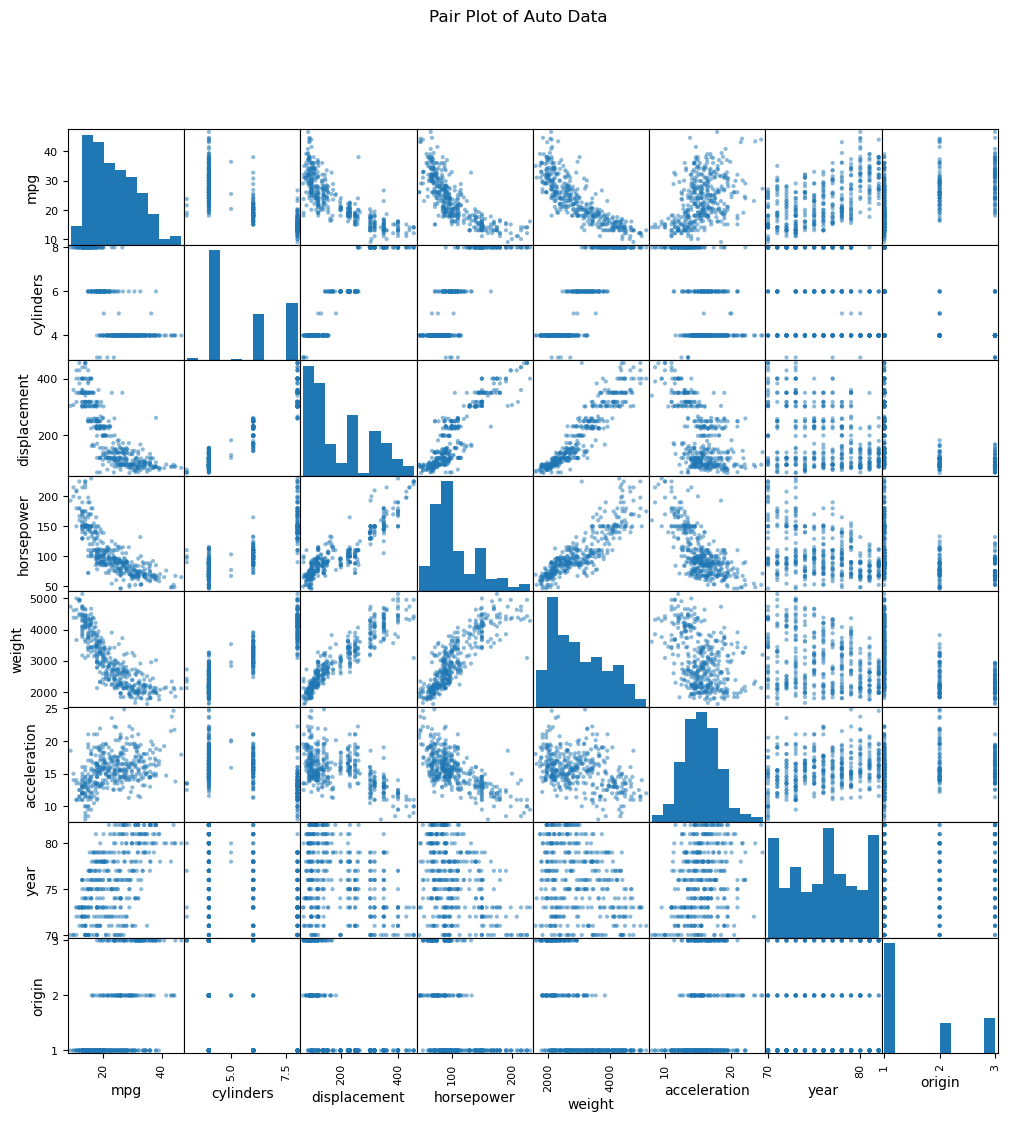

In [7]:
pd.plotting.scatter_matrix(auto, figsize=(12, 12))
plt.suptitle('Pair Plot of Auto Data')

The pair plot provides a comprehensive visual summary of the relationships between all the variables. The scatter plots reveal several key findings:

* There's a strong positive correlation between several of the quantitative predictors. For example, `horsepower`, `weight`, and `displacement` are all positively related to each other. Cars that have larger engine displacement tend to be heavier and have more horsepower. The relationship appears mostly linear.
* The `cylinders` variable, which is discrete, shows a clear positive relationship with other variables like `displacement`, `horsepower`, and `weight`. Vehicles with more cylinders generally have larger, heavier, and more powerful engines.
* The `acceleration` variable has negative trends with `displacement` (slightly), `horsepower` (fairly), and `weight` (slightly), suggesting that heavier, more powerful cars may not always be the fastest.

#### (f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

The plots strongly suggest that many of the other variables will be useful in predicting `mpg`. We can justify this by observing the relationships in the first column of the pair plot, which shows `mpg` plotted against every other variable.

* The scatter plots of `mpg` versus `horsepower`, `weight`, and `displacement` show a strong, clear negative relationship. As `horsepower`, `weight`, or `displacement` increase, `mpg` consistently decreases. The distinct downward slope in these plots indicates that they are highly useful predictors.
* The `mpg` vs. `cylinders` plot shows that the average `mpg` value is significantly lower for cars with more cylinders compared to those with fewer.

In short, any variable that shows a discernible trend (linear or otherwise) with `mpg` is a useful predictor, and the pair plot confirms that most of the variables in this dataset fit that description.

### Question 2: ISLP $\S$ 2.4.2

#### Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

In each of these scenarios, we establish that $n$ is the number of data points, and $p$ is the number of predictors, or features.

**(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.**

In this scenario, an attempt is being made to understand the behaviors of the data and its effect on the target variable within the time frame provided, rather than predict behaviors of the target variable in the future. I can thus conclude that we are interested primarily in **inference** here. Considering that salary is a quantitative variable, due to its variability, wide range, and continuous, rather than discrete, numerical nature as a value, I can assume that this analysis would need **regression**, since classification will need a few discrete, and a certain number of groups to classify into. Here, $n=500$, since the analysis is using data from 500 firms, and $p=3$, considering the CEO salary is a target variable and won't be counted as a predictor.

**(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.**

In this scenario, an attempt is being made to forecast the outcome of a new product through different market factors of existing products that are similar to the new one. I can thus conclude that we are interested primarily in **prediction** here, rather than understanding what led to the success and failure of the 20 other products that have already been launched. Considering that the target variable, which is the market outcome of the product, has two discrete levels, i.e., success or failure, we assume this variable is of a qualitative nature, and we can further assume that this is a **classification** problem, since we have to use the other factors to classify the new product between one of two levels. Here, $n=20$, since there are twenty existing data points. $p=13$ here; this is because there are 4 named variables, and 10 unnamed ones, out of which 1 of the variables is the target variable.

**(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For
each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.**

In this scenario, an attempt is being made to forecast the percent change in the exchange rate in relation to the percent change by week in three other markets around the world. I can thus conclude, from just the framing of the question, that this is a **prediction** problem. Considering that percent changes are on a continuous numerical scale and fluctuate between multiple decimal values, this is a quantitative target variable, and thus leads me to conclude that this problem is a **regression** problem. There are weekly values for the year 2012 in the data here, so $n=52$, since there were 52 weeks in the year 2012. Considering we are using market changes from three markets to predict the exchange rate, we can also conclude that $p=3$.

### Question 3: ISLP $\S$ 2.4.4

#### (a) Describe *one* real-life application in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

Here are three applications of classification I see in real life:

1. While this is a massive oversimplification, the "algorithm" in social media and video-sharing websites can be thought of as a classification model. The response here is a discrete, categorical variable with levels "recommend" and "do not recommend". The predictors could be things like what videos I have watched, for how long, whether I finished them, and if I have watched them again (these apply to video-sharing sites); what posts I have liked, commented on, or shared; the accounts I follow/am subscribed to; my demographic information, like age, gender, region, etc. This is clearly a prediction, by virtue of the fact that the model is predicting what I want to watch or see, as well as the fact that the model can be entirely wrong. An example is when I am recommended posts not in line with my political views, just because I may have searched an account that promotes views to inform myself.
2. I believe one of the most common applications of classification is the spam filter in emails. The response here is a discrete, categorical variable with levels "spam" and "not spam". The predictors could be things like the occurrence of some common words associated with a spam email (e.g., "free," "winner," "urgent"), the sender's address (this might need NLP, however, if my understanding of NLP is correct), and the number of recipients. This is a prediction, by virtue of the fact that the goal is to automatically sort an email before the user even sees it. The model's primary task is to make a fast and accurate guess on new emails, and it can be entirely wrong, sometimes sending a legitimate email to the spam folder.
3. Another important application is in loan or credit card applications to analyze risk in lending money to the borrower or approving an applicant for their credit card. The response here is a discrete, categorical variable with levels "risky" and "not risky", or "approve" and "deny". The predictors can include credit score, income, past defaults, age, and employment status. While I feel this is obviously a prediction model, a perspective can be provided in terms of inference by virtue of the fact that the model can be used to rewrite lending policies based on past data.

> I used Gemini by Google for the first application, since I was a little lost and needed a head start on what were potential predictors for a model like this. My prompt was as follows:
>> what are examples of predictors for the "algorithm" that recommends content on social media and video-sharing sites, in the context that i am simplifying this model to a simple classification problem?

> **Note to grader:** I just read the question properly, but I feel bad deleting the other responses I wrote, so I am submitting three examples for the first one.

#### (b) Describe *one* real-life application in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

I believe fitness apps can use regression to see how their app helps their users' fitness goals through responses such as a net change in weight, for example, where the user wants to undergo weight loss. Here, predictors can be the frequency of active time, number of workouts, intensity of workouts, original weight, goal weight, etc. This is an inference application, since the app can be tweaked based on the net percent change in weight by the user.

### Question 4: ISLP $\S$ 2.4.3

#### (a)  Provide a sketch of typical (squared) bias, variance, training error, test error, and irreducible error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

![plot](../img/error-flexibility-plot.jpg)

#### (b) Explain why each of the five curves has the shape displayed in part (a).

As we increase the flexibility of a statistical learning method, there's a trade-off between bias and variance. Less flexible models, such as regression-based models, have high bias because they can't capture the complex patterns in the data; however, they have low variance because their predictions remain consistent even with different training sets. Conversely, highly flexible models, and even black-box models, like deep neural networks, have low bias because they fit the training data extremely well, but they suffer from high variance as they become overly sensitive to noise. Thus, the bias and variance curves are almost opposite to each other, with bias decreasing with nearly, if not exactly, the same magnitude as variance increases.

The bias-variance trade-off impacts the error curves. The training error consistently decreases as flexibility increases because the model can fit the training data more closely. However, the test error, which is what we should care about, follows a near U-shaped curve. This is because it decreases as bias is reduced, but eventually rises again as the model becomes too flexible and suffers from high variance and overfitting. The lowest point on this curve represents the optimal balance. Finally, there is an intrinsic, constant, irreducible error that no model can ever eliminate, as it's caused by the random noise in the data itself, and not the noise that is captured by highly flexible, overfitted models.

### Question 5: ISLP $\S$ 2.4.8

This exercise relates to the College data set, which can be found in the file `College.csv` on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are

  * `Private`: Public/private indicator
  * `Apps`: Number of applications received
  * `Accept`: Number of applicants accepted
  * `Enroll`: Number of new students enrolled
  * `Top10perc`: New students from top 10% of high school class
  * `Top25perc`: New students from top 25% of high school class
  * `F.Undergrad`: Number of full-time undergraduates
  * `P.Undergrad`: Number of part-time undergraduates
  * `Outstate`: Out-of-state tuition
  * `Room.Board`: Room and board costs
  * `Books`: Estimated book costs
  * `Personal`: Estimated personal spending
  * `PhD`: Percent of faculty with Ph.D.s
  * `Terminal`: Percent of faculty with terminal degree
  * `S.F.Ratio`: Student/faculty ratio
  * `perc.alumni`: Percent of alumni who donate
  * `Expends`: Instructional expenditure per student
  * `Grad.Rate`: Graduation rate

Before reading the data into Python, it can be viewed in Excel or a text editor.

#### (a) Use the `pd.read_csv()` function to read the data into Python. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.

In [8]:
college = pd.read_csv('../data/College.csv')

#### (b) Look at the data used in the notebook by creating and running a new cell with just the code `college` in it.

In [9]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


You should notice that the first column is just the name of each university in a column named something like `Unnamed: 0`. We don't really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames.

In [10]:
college2 = pd.read_csv('../data/College.csv', index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [11]:
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is `Private`. Note that the names of the colleges appear on the left of the table. We also introduced a new Python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with the following:

In [12]:
college = college3

#### (c) Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [13]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### (d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list `C` of columns of a data frame `A` using `A[C]`.

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

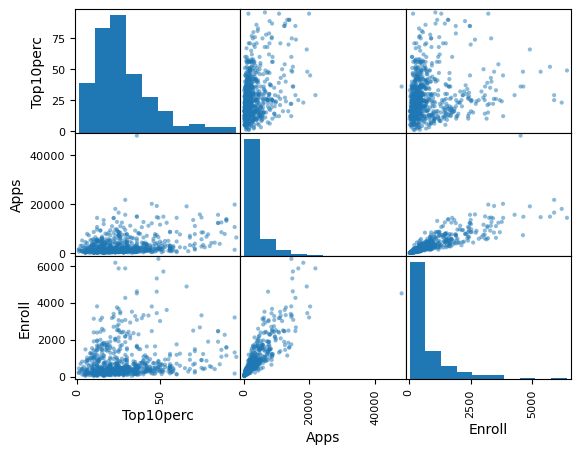

In [14]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])

#### (e) Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

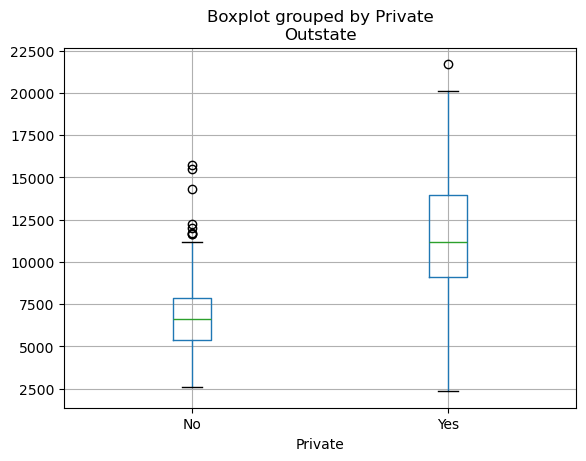

In [15]:
college.boxplot(column='Outstate', by='Private')

#### (f) Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [16]:
college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are.

In [17]:
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` versus `Elite`.

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

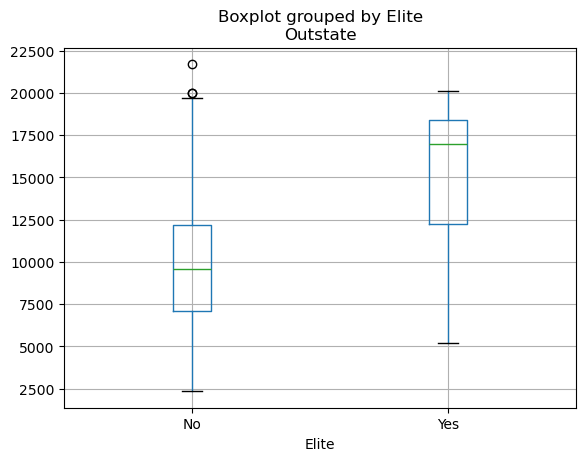

In [18]:
college.boxplot(column='Outstate', by='Elite')

#### (g) Use the `plot.hist()` method of `college` to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

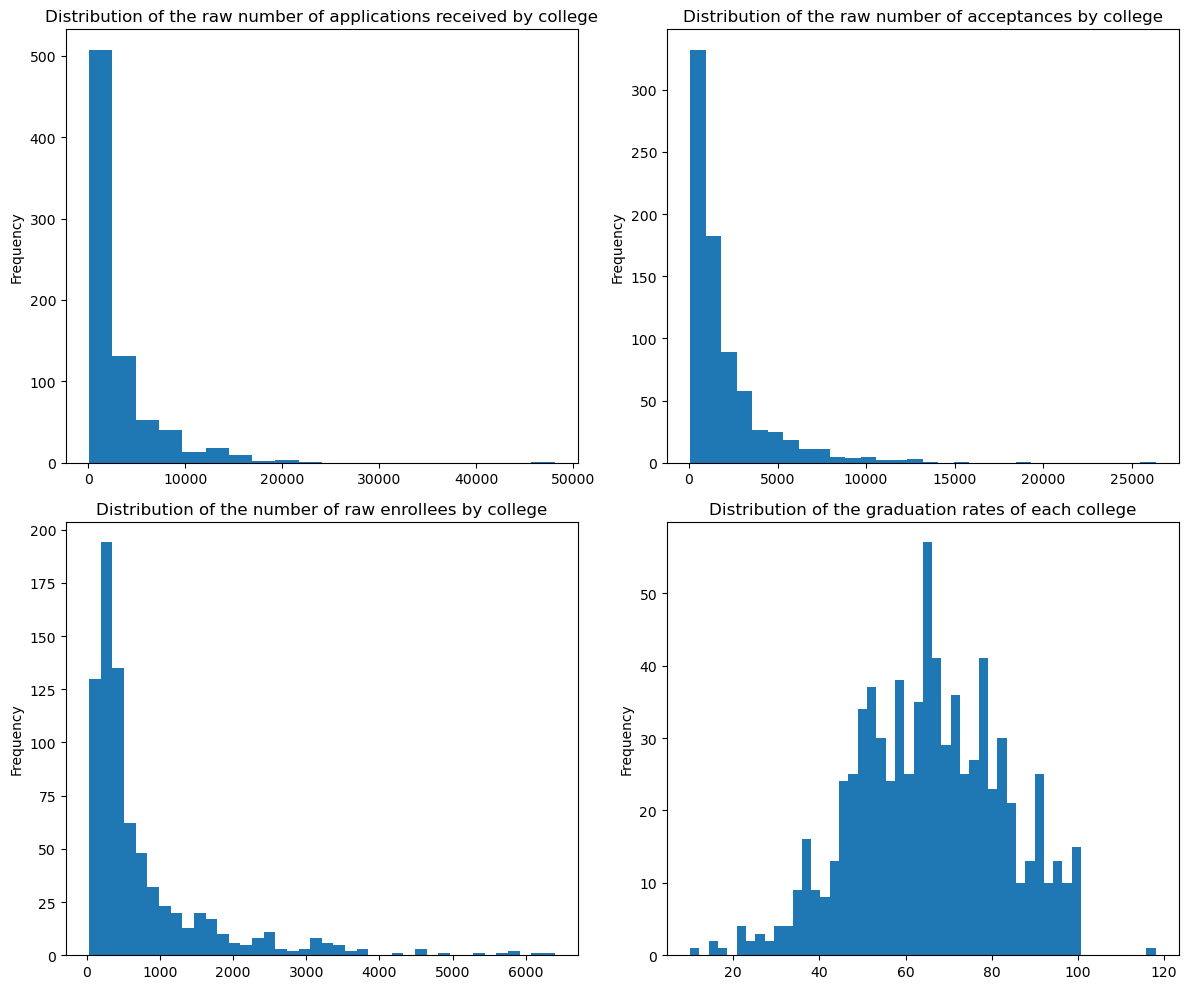

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

college['Apps'].plot.hist(ax=ax1, bins=20, title='Distribution of the raw number of applications received by college')
college['Accept'].plot.hist(ax=ax2, bins=30, title='Distribution of the raw number of acceptances by college')
college['Enroll'].plot.hist(ax=ax3, bins=40, title='Distribution of the number of raw enrollees by college')
college['Grad.Rate'].plot.hist(ax=ax4, bins=50, title='Distribution of the graduation rates of each college')

plt.tight_layout()

#### (h) Continue exploring the data and provide a brief summary of what you discover.

Text(0.5, 0.98, 'Pair Plot of College Data')

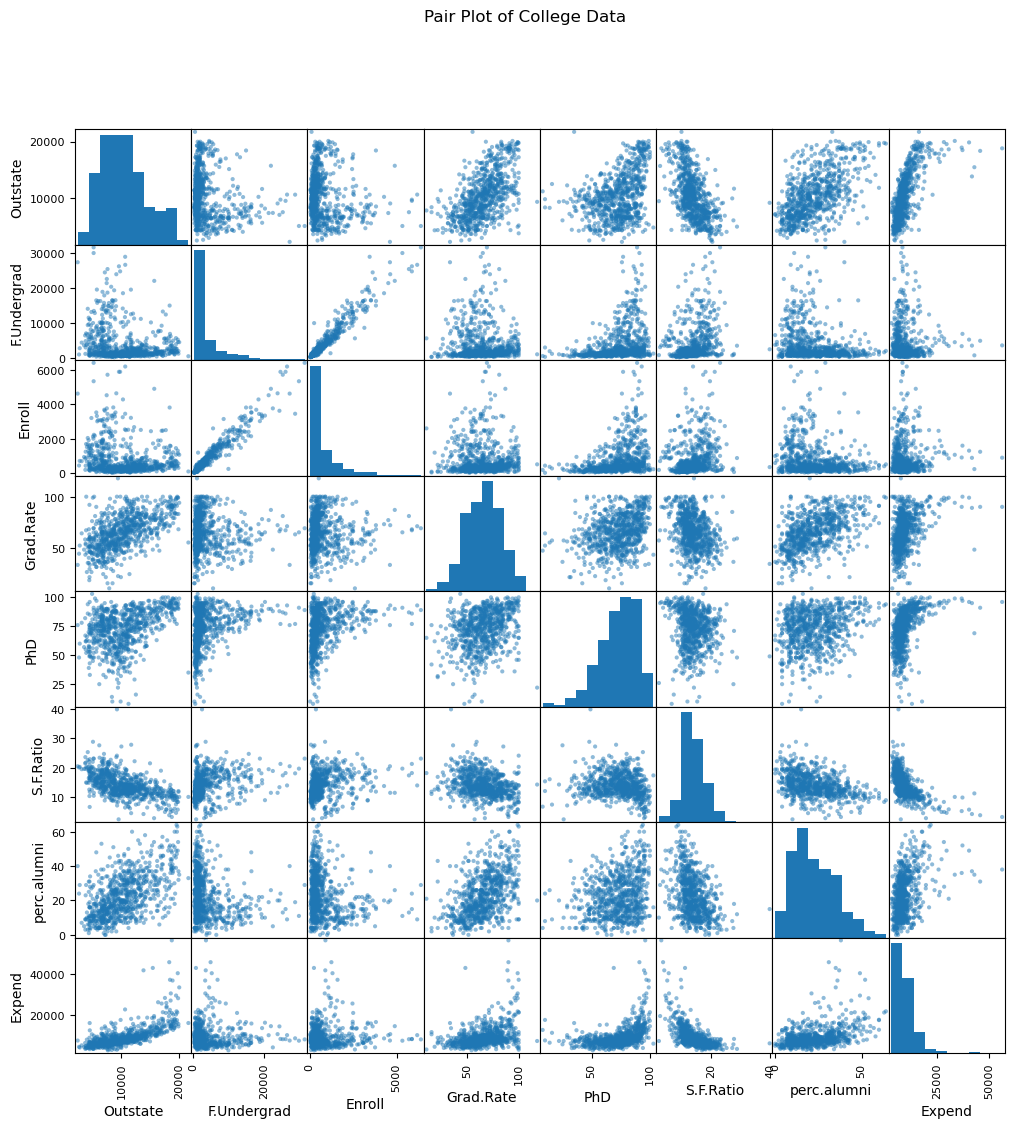

In [20]:
select = ['Outstate', 'F.Undergrad', 'Enroll', 'Grad.Rate', 'PhD', 'S.F.Ratio', 'perc.alumni', 'Expend']
pd.plotting.scatter_matrix(college[select], figsize=(12, 12))
plt.suptitle('Pair Plot of College Data')

Text(0.5, 1.0, 'Out-of-State Tuition by Funding Model (Private or not)')

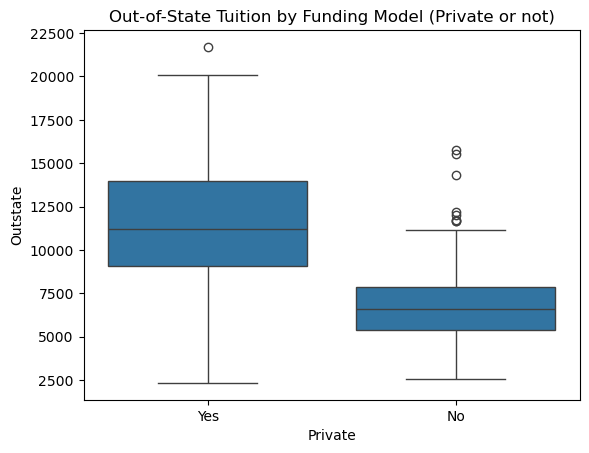

In [21]:
sns.boxplot(data=college, x='Private', y='Outstate')
plt.title('Out-of-State Tuition by Funding Model (Private or not)')

Text(0.5, 1.0, 'Student/Faculty Ratio by Funding Model (Private or not)')

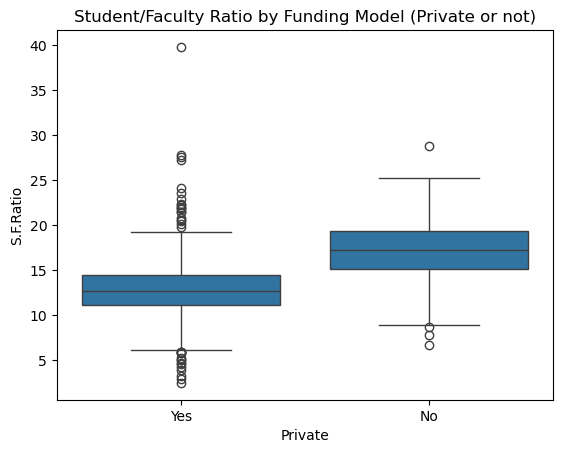

In [22]:
sns.boxplot(data=college, x='Private', y='S.F.Ratio')
plt.title('Student/Faculty Ratio by Funding Model (Private or not)')

Text(0.5, 1.0, 'Out-of-State Tuition by Elite Status of College')

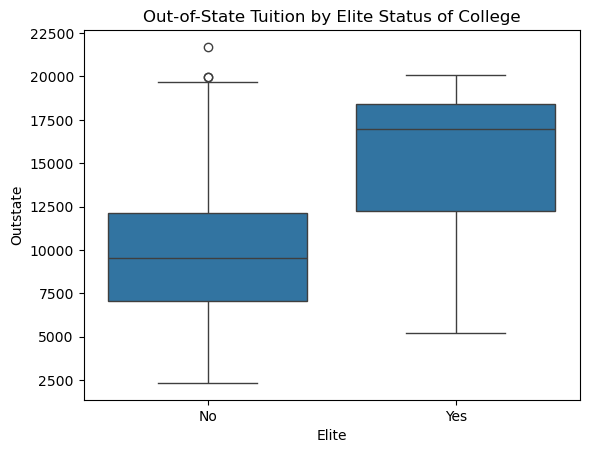

In [23]:
sns.boxplot(data=college, x='Elite', y='Outstate')
plt.title('Out-of-State Tuition by Elite Status of College')

Text(0.5, 1.0, 'Graduation Rate by Elite Status of College')

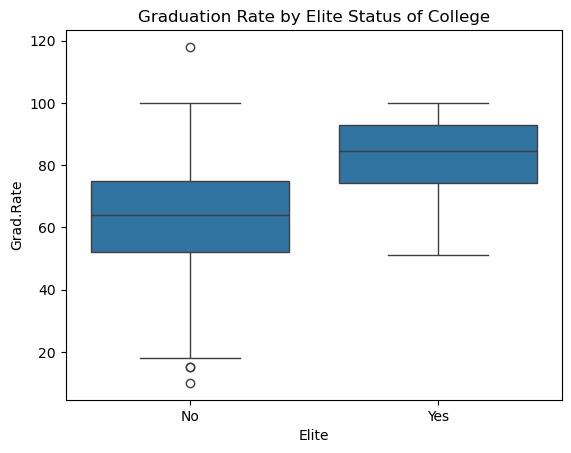

In [24]:
sns.boxplot(x='Elite', y='Grad.Rate', data=college)
plt.title('Graduation Rate by Elite Status of College')

The pair plot matrix provides a visual representation of the relationships between several key quantitative variables. There is a strong positive correlation between per-student instructional expenditure and the out-of-state tuition of colleges. Generally, universities with higher out-of-state tuition typically spend more money to teach the average student at their institution. While there is an almost linear relationship between total full-time undergraduate enrollment and enrollment for the year, this could be attributed to multicollinearity since most colleges typically have some relationship between students enrolled in a year and the total undergraduate class size. I can also observe a strong negative correlation between student/faculty ratio and out-of-state tuition, indicating that schools with fewer students per faculty member charge higher tuition for out-of-state students.

Private schools tend to have higher out-of-state tuition and lower student/faculty ratios. On the other hand "elite" colleges tend to have a higher graduation rate, and a higher out-of-state tuition.